# README
---

Following is a brief recap of the columns, and issues we tackled on SQL.  
The there is a brief overview of the contents of this notebook. 

## Recap
---

 ### Columns

<ul>
  <li><b>ride_id:</b> A unique identifier for each ride.</li>
  <li><b>rideable_type:</b> Type of rideable vehicle used for the trip (classic_bike,electric_bike,docked_bike).</li>
  <li><b>started_at:</b> The date and time when the ride started. (datetime data).</li>
  <li><b>ended_at:</b> The date and time when the ride ended. (datetime data).</li>
  <li><b>start_station_name:</b> The name of the station where the ride started.</li>
  <li><b>start_station_id:</b> The unique identifier of the station where the ride started.</li>
  <li><b>end_station_name:</b> The name of the station where the ride ended.</li>
  <li><b>end_station_id:</b> The unique identifier of the station where the ride ended.</li>
  <li><b>start_lat:</b> The latitude coordinate of the starting station.</li>
  <li><b>start_lng:</b> The longitude coordinate of the starting station.</li>
  <li><b>end_lat:</b> The latitude coordinate of the ending station.</li>
  <li><b>end_lng:</b> The longitude coordinate of the ending station.</li>
  <li><b>member_casual:</b> Indicates whether the rider is a member or a casual user of the service. (member,casual).</li>
  <li><b>ride_duration:</b> Ride duration in minutes (keeping two decimal points).</li>
  <li><b>day_of_the_week:</b> Day of the week the bike ride started in Mon,Tue,... Format.</li>
  <li><b>month:</b> Month that the bike ride started in Jan,Feb,... Format.</li>
</ul>


### Data Cleaning & Data integrity

<h4>Cleaning results for columns used:</h4>
<ul>
    <li><b>ride_id:</b> No issues found. Has been set to VARCHAR(16), primary key.</li>
    <li><b>rideable_type:</b> Types of rideable vehicle used for the trip (classic_bike, electric_bike, docked_bike).</li>
    <li><b>started_at, ended_at:</b> Within range. Some end before starting, resulting in negative ride_durations, that have been cleaned and set to NULL.</li>
    <li><b>start_lat, start_lng:</b> No issues found.</li>
    <li><b>end_lat:</b> Had three invalid 0.0 values, have been set to NULL.</li>
    <li><b>end_lng:</b> Had three invalid 0.0 values, have been set to NULL.</li>
    <li><b>member_casual:</b> No issues found.</li>
</ul>

<h4>Cleaning results for columns created:</h4>
<ul>
    <li><b>ride_duration:</b> Duration of ride in min, have set negative durations to NULL, won't tamper with our analysis.</li>
    <li><b>day_of_the_week:</b> No issues.</li>
    <li><b>month:</b> No issues.</li>
</ul>

<h4>Cleaning results for columns not used:</h4>
<ul>
    <li><b>start_station_name, end_station_name:</b> Many typos. Station name can match to more than one id. Has NULL values. Are not a part of our analysis.</li>
    <li><b>start_station_id, end_station_id:</b> Same station id can match to more than one station. Has NULL values. Are not a part of our analysis.</li>
</ul>

<h4>Issues found:</h4>
<ul>
    <li><b>Incomplete:</b>
        <ul>
            <li>Rows are sometimes incomplete, and have missing values for end start information.</li>
        </ul>
    </li>
    <li><b>Reliability issues:</b>
        <ul>
            <li>Some rides seem to end before starting, resulting in negative ride_duration, that have been cleaned and set to NULL.</li>
        </ul>
    </li>
    <li><b>Names of stations have errors, and no actual station info was provided to validate.</b></li>
    <li><b>Station ids are not always unique to the station, and have many different formats</b> (ex. some had 3 numbers some had 5).</li>
    <li><b>end_lat, end_lng had three 0.0 values. Cleaned.</b></li>
</ul>


## Brief Overview
---

<ul>
    <li><a href="#importing-necessary-libraries">1. Importing Necessary Libraries</a></li>
    <li><a href="#data-import-and-preparation">2. Data Import and Preparation</a>
        <ul>
            <li>2.1 Import Data</li>
                <ul>
                <li>Option 1: Importing Data from SQL</a></li>
                <li>Option 2: Importing Data from CSV</a></li>
                </ul>
            <li>2.2 Setting and Checking Column Data Types</a>
                <ul>
                    <li>2.3.1 Assigning Data Types</a></li>
                    <li>2.3.2 Verifying Data Types</a></li>
                </ul>
            </li>
        </ul>
    </li>
    <li><a href="#exploratory-data-analysis">3. Exploratory Data Analysis (EDA)</a>
        <ul>
            <li><a href="#descriptive-statistics">3.1 Descriptive Statistics</a></li>
            <li><a href="#data-visualization">3.2 Data Visualization</a>
                <ul>
                    <li><a href="#about-number-of-rides">3.2.1 About Number of Rides</a>
                        <ul>
                            <li>A. Pie Chart: Number of Rides (Members vs Casuals)</a></li>
                            <li>B. Weekly Ride Distribution (Members vs Casuals)</a></li>
                            <li>C. Monthly Ride Distribution (Members vs Casuals)</a></li>
                        </ul>
                    </li>
                    <li><a href="#about-ride-duration">3.2.2 About Ride Duration</a>
                        <ul>
                            <li>A. Weekly Ride Duration (Members vs Casuals)</a></li>
                            <li>B. Monthly Ride Duration (Members vs Casuals)</a></li>
                        </ul>
                    </li>
                    <li><a href="#about-rideable-type">3.2.3 About Rideable Type</a>
                        <ul>
                            <li>A. Pie Chart: Rideable Type Distribution (Electric vs Classic Bikes)</a></li>
                            <li>B. Bar Charts: Rideable Types Distribution (Members vs Casuals)</a></li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>    
</ul>

<ul>
<li><a href="#4-results">4. Conclusion</a>
</li>
</li>
<li><a href="#5-suggestions">5. Suggestions</a>
</li>
<ul>



# 1. Importing Necessary Libraries <a id="importing-necessary-libraries"></a>


**pip that need to be installed:**  
pip install jupyter lab  
pip install numpy  
pip install pandas  
pip install sqlalchemy  
pip install psycopg2-binary  
pip install matplotlib
pip install scipy # need for trimmed mean

In [1]:
import numpy as np
import pandas as pd
import os
from sqlalchemy import create_engine #to import data from sql
import matplotlib.pyplot as plt # graphs
from matplotlib import rc
from scipy.stats import trim_mean # need for trimmed mean

# 2. Data Import and Preparation <a id="data-import-and-preparation"></a>
---

## 2.1 Import
---

### Option 1: Importing Data from SQL

<div class="alert alert-block alert-danger"><b>Important:</b> Change connection inputs to your database inputs. <br> Running the following code may take some minutes </div>

import pandas as pd
from sqlalchemy import create_engine
#--------------change this part ------------------
# Database Inputs
db_name = 'divvy-tripdata'
db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5432'
#-------------------------------------------------
# Create an engine
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
query = '''SELECT
    ride_id, 
    rideable_type,
    started_at,
    ended_at,
    start_lat,
    start_lng,
    end_lat,
    end_lng,
    member_casual,
    ride_duration,
    day_of_the_week,
    month
FROM bike_data'''
# Create Dataframe:
df = pd.read_sql(query, engine)
# Print Dataframe:
print(df)

#create a csv file for imported data from SQL
folder = r'C:\0.Sync\Coding\Data\Projects\CyclisticBike-Share'
file = 'divvy-tripdata_2023.csv'
path=os.path.join(folder, file)
df.to_csv(path, index=False)
print("CSV divvy-tripdata_2023.csv, created")

### Option 2: Importing Data from CSV

<div class="alert alert-block alert-danger"><b>Important:</b> Change folder,file to you path and csv file name </div>

In [2]:
#--------------change this part ------------------
folder = r'C:\0.Sync\Coding\Data\Projects\CyclisticBike-Share'
file = 'divvy-tripdata_2023.csv'
#-------------------------------------------------
path=os.path.join(folder, file)
df= pd.read_csv(path)
print(df)

                  ride_id  rideable_type           started_at  \
0        C4E20E743EEBE781   classic_bike  2023-08-02 19:05:40   
1        AB17A09B37BAD39A  electric_bike  2023-08-18 22:53:20   
2        0B17D56196D063EA  electric_bike  2023-08-19 07:56:18   
3        2A13287E5EC2CF69  electric_bike  2023-08-01 18:28:08   
4        1B7F1EB9737E7BBF  electric_bike  2023-08-01 17:24:05   
...                   ...            ...                  ...   
5719872  D0999A931724CACE  electric_bike  2023-04-15 13:11:52   
5719873  EFE86CD88CB1E5A2  electric_bike  2023-04-30 09:22:31   
5719874  438A83BF9F60BF50  electric_bike  2023-04-26 19:52:11   
5719875  C0317955023D29A7   classic_bike  2023-04-21 08:55:04   
5719876  C683EBE98B35F092  electric_bike  2023-08-21 18:48:13   

                    ended_at  start_lat  start_lng    end_lat    end_lng  \
0        2023-08-02 19:46:57  41.886976 -87.612813  41.922167 -87.638888   
1        2023-08-18 23:03:28  41.915845 -87.634696  41.900000 -87.6

## 2.2 Setting and Checking Column Data Types
---

### 2.2.1 Assigning Data Types

In [3]:
# Set data types:
# Assign as string:
df['ride_id'] = df['ride_id'].astype(str)  # 16 length, unique, hex

# Assign as categorical 
## categorical, without order:
df['rideable_type'] = df['rideable_type'].astype('category') #is categorical value with no order

df['member_casual'] = df['member_casual'].astype('category')

## Assign as categorical, with order:
day_of_the_week_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=day_of_the_week_order, ordered=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Assign as datetime:
df['started_at'] = pd.to_datetime(df['started_at'])  
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Assign as float:
df['start_lat'] = df['start_lat'].astype('float64')
df['start_lng'] = df['start_lng'].astype('float64')
df['end_lat'] = df['end_lat'].astype('float64')
df['end_lng'] = df['end_lng'].astype('float64')
df['ride_duration'] = df['ride_duration'].astype('float64')

print('Data types have been assigned')

Data types have been assigned


### 2.2.2 Verifying Data Types

In [4]:
# print datatypes
print("The datatypes have been assigned as:")
print(df.dtypes)
print("------------------------------")

# check if ride_id has unique values
if_unique_ride_id=df['ride_id'].nunique()==df.shape[0]
print(f"All ride_id's are unique={if_unique_ride_id}")
print("------------------------------")

# explore categorical data types:
print("By checking all categorical values we have:\n")
columns_check=['rideable_type','member_casual','day_of_the_week','month']
for i in columns_check:
    print(f"{i} has {df[i].unique()} values\n and unique values {df[i].nunique()}\n")


The datatypes have been assigned as:
ride_id                    object
rideable_type            category
started_at         datetime64[ns]
ended_at           datetime64[ns]
start_lat                 float64
start_lng                 float64
end_lat                   float64
end_lng                   float64
member_casual            category
ride_duration             float64
day_of_the_week          category
month                    category
dtype: object
------------------------------
All ride_id's are unique=True
------------------------------
By checking all categorical values we have:

rideable_type has ['classic_bike', 'electric_bike', 'docked_bike']
Categories (3, object): ['classic_bike', 'docked_bike', 'electric_bike'] values
 and unique values 3

member_casual has ['casual', 'member']
Categories (2, object): ['casual', 'member'] values
 and unique values 2

day_of_the_week has ['Wed', 'Fri', 'Sat', 'Tue', 'Thu', 'Sun', 'Mon']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Th

In [5]:
print("By checking all categorical values we have:\n")
columns_check=['rideable_type','member_casual','day_of_the_week','month']
for i in columns_check:
    print(f"{i} has {df[i].unique()} values\n and unique values {df[i].nunique()}\n")

By checking all categorical values we have:

rideable_type has ['classic_bike', 'electric_bike', 'docked_bike']
Categories (3, object): ['classic_bike', 'docked_bike', 'electric_bike'] values
 and unique values 3

member_casual has ['casual', 'member']
Categories (2, object): ['casual', 'member'] values
 and unique values 2

day_of_the_week has ['Wed', 'Fri', 'Sat', 'Tue', 'Thu', 'Sun', 'Mon']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat' < 'Sun'] values
 and unique values 7

month has ['Aug', 'Apr', 'May', 'Jun', 'Sep', ..., 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec'] values
 and unique values 12



# 3. Exploratory Data Analysis (EDA)<a id="exploratory-data-analysis"></a>
---

## 3.1 Descriptive Statistics <a id="descriptive-statistics"></a>
---

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ride_id          object        
 1   rideable_type    category      
 2   started_at       datetime64[ns]
 3   ended_at         datetime64[ns]
 4   start_lat        float64       
 5   start_lng        float64       
 6   end_lat          float64       
 7   end_lng          float64       
 8   member_casual    category      
 9   ride_duration    float64       
 10  day_of_the_week  category      
 11  month            category      
dtypes: category(4), datetime64[ns](2), float64(5), object(1)
memory usage: 370.9+ MB


In [7]:
# column list based on dtype
category_columns = df.select_dtypes(include=['category']).columns.tolist()
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()

#All Missing values
missing_values = df.isnull().sum()
#1. Categorical Data
categorical_summary = df[category_columns].describe()
#2. Datetime Data
datetime_summary=df[datetime_columns].describe()
#3. Numeric Data
float_summary=df[float_columns].describe().map(lambda x: f'{x:,.2f}')
#4. object -> ride_id (all are unique)
object_summary=df[object_columns].describe()

#all printouts
print("----Missing values----")
print(missing_values)
print("----------------Summary:Categorical Data----------------")
print(categorical_summary)
print("----------------Categorical value counts----------------")
for col in category_columns:
    print("\n",df[col].value_counts().sort_values())
print("----------------Summary:Datetime Data----------------")
print(datetime_summary)
print("----------------Summary:Numeric Data----------------")
print(float_summary)
print("----------------Summary:ride_id----------------")
print(object_summary)


----Missing values----
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_lat             0
start_lng             0
end_lat            6993
end_lng            6993
member_casual         0
ride_duration       272
day_of_the_week       0
month                 0
dtype: int64
----------------Summary:Categorical Data----------------
        rideable_type member_casual day_of_the_week    month
count         5719877       5719877         5719877  5719877
unique              3             2               7       12
top     electric_bike        member             Sat      Aug
freq          2945579       3660698          883566   771693
----------------Categorical value counts----------------

 rideable_type
docked_bike        78287
classic_bike     2696011
electric_bike    2945579
Name: count, dtype: int64

 member_casual
casual    2059179
member    3660698
Name: count, dtype: int64

 day_of_the_week
Mon    729404
Sun    744578
Tue    822978
We

## 3.2 Data Visualization <a id="data-visualization"></a>
---

#4095A5 #cyclistic_blue  
#F2FC67 #cylcistic_yellow #F2FC67 #golden

In [8]:
# Image - Plot save
# If you run the code with image_save=False, it doesn't save the images. If set to True then saves them on the directory of the running .ipynb file
image_save=True

### 3.2.1 About Number of Rides <a id="about-number-of-rides"></a>
---

#### A. Pie Chart: Rides Distribution (Members vs Casuals)

Compare the percentage of rides taken by members and casual riders.

C:\Users\Jim\AppData\Local\Temp\ipykernel_17040\2908337401.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_member_casual_size = df.groupby('member_casual', dropna=False).size()


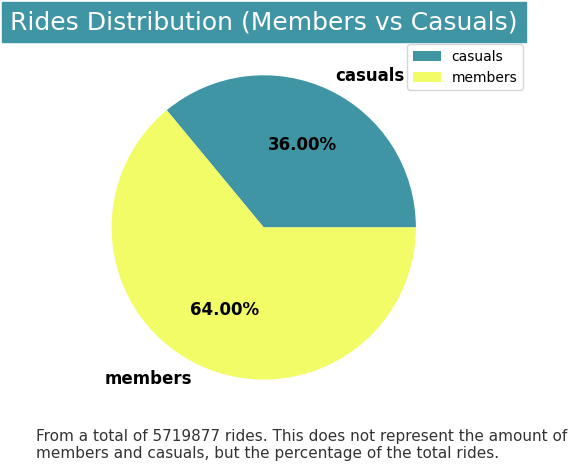

In [13]:
# Set the df for plot:
grouped_member_casual_size = df.groupby('member_casual', dropna=False).size()

## Calculate percentages for plot:
df_pie_members_casuals = round(grouped_member_casual_size / grouped_member_casual_size.sum()* 100, 2) 

## Change 'casual' to 'casuals' and 'member' to 'members' for better display:
df_pie_members_casuals.index = ['members' if x == 'member' else 'casuals' for x in df_pie_members_casuals.index]

# Presets for plot:
color = ['#4095A5', '#F2FC67']

# Plot
plt.pie(df_pie_members_casuals,
        colors=color,
        labels=df_pie_members_casuals.index,
        autopct='%1.2f%%',
        textprops={'weight': 'bold', 'size': 'large'})  # adjust textprops

# Display: plot
plt.title("Rides Distribution (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.legend(df_pie_members_casuals.index,
           loc='upper right',bbox_to_anchor=(1.2, 1))
plt.text(-1.5, -1.5, f"From a total of {df['member_casual'].shape[0]} rides. This does not represent the amount of members and casuals, but the percentage of the total rides.",
         alpha=0.8,fontsize=11,ha='left', wrap=True,)
plt.tight_layout()

# Save image if set to True
if image_save==True:
    plt.savefig('Pie_Number of Rides (Members vs Casuals).png', dpi=300)

plt.show()


<b>Main Takeaways</b><br>
<b>Graph:</b> The pie chart illustrates <u>the distribution of rides between members and casual users</u>, indicating the proportion of total rides attributed to each user group.
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Majority Share:</b> <u>Members account for the majority of rides</u>. This suggests a strong and consistent user base within the membership program, likely comprising regular commuters or frequent users of bike services.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Substantial Share:</b> <u>Casual users contribute a significant portion of rides</u>. This highlights the importance of catering to casual users and accommodating their needs within the bike-sharing system.</li>
    </ul>
  </li>
</ul>


#### B. Weekly Ride Distribution (Members vs Casuals)

Compare the percentage of rides taken by members and casual riders across different days of the week.

C:\Users\Jim\AppData\Local\Temp\ipykernel_17040\2534903566.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week = df.groupby(['member_casual','day_of_the_week']).size()


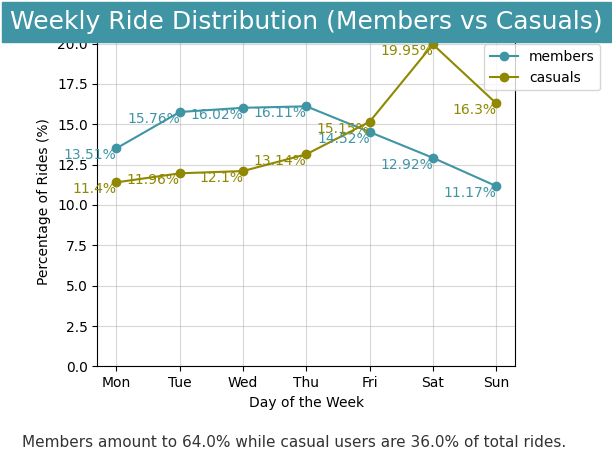

In [23]:
# Set the df for plot:
## Group the DataFrame by 'day_of_the_week' and calculate the size
grouped_day_of_the_week = df.groupby(['member_casual','day_of_the_week']).size()

## Line plot 1: Members
member_counts = grouped_day_of_the_week.loc['member']
### Calculate percentages for members:
member_percentages = round(member_counts / member_counts.sum()*100, 2) 

## Line plot 2: Casuals
casual_counts = grouped_day_of_the_week.loc['casual']
### Calculate percentages for casual users:
casual_percentages = round(casual_counts / casual_counts.sum()* 100, 2) 

# Preset for plot:
color = ['#4095A5', '#8F8800']
#plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(grouped_day_of_the_week.loc['member'].index, member_percentages.values, 
         color=color[0],marker='o',label='members')
plt.plot(grouped_day_of_the_week.loc['casual'].index, casual_percentages.values,
         color=color[1],marker='o',label='casuals')

# Annotate values on the graph
for x, y in zip(grouped_day_of_the_week.loc['member'].index, member_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='top', fontsize=10, color=color[0], rotation=0)

for x, y in zip(grouped_day_of_the_week.loc['casual'].index, casual_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='top', fontsize=10, color=color[1], rotation=0)

# Display: plot
plt.title("Weekly Ride Distribution (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Rides (%)')
plt.ylim(bottom=0)
plt.grid(True,alpha=0.5)
plt.legend(loc='upper right',bbox_to_anchor=(1.22, 1))
plt.text(-1.5, -5, f"Members amount to {round(member_counts.sum()/grouped_day_of_the_week.sum()*100,2)}% while casual users are {round(casual_counts.sum()/grouped_day_of_the_week.sum()*100,2)}% of total rides.",
         alpha=0.8,fontsize=11,ha='left', wrap=True)
plt.tight_layout()

# Save image if set to True
if image_save==True:
    plt.savefig('Weekly Ride Distribution (Members vs Casuals).png', dpi=300)

plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Day-of-the-Week Distribution:</b> Both members and casual users exhibit distinct patterns in ride distribution across different days of the week, <u>reflecting potential variations in usage behavior or preferences.</u></li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Midweek Peak:</b> <u>Members show peak ride percentages in the middle of the week.</u> This suggests that members may utilize bike services more frequently for commuting purposes or midweek activities.</li>
      <li><b>Weekend Decline:</b> <u>Ride percentages for members decrease towards the weekend.</u> This decline may indicate reduced usage for leisure or recreational purposes during weekends among members.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Weekend Peak:</b> Casual users demonstrate a <u>significant increase in ride percentages during the weekend</u>. This surge suggests that casual users may prefer bike services for leisure or weekend activities, contributing to higher usage during weekends.</li>
      <li><b>Weekday Decline:</b> Ride percentages for casual users are lower across weekdays, while increasing closer to the weekend. This indicates potential differences in usage behavior or preferences among casual users during weekdays.</li>
    </ul>
  </li>
</ul>
<b>Members demonstrate different behaviors from casuals users</b>, as members ride more during weekdays, while casual users use them more on weekends.   



#### C. Monthly Ride Distribution (Members vs Casuals)

Compare the percentage of rides taken by members and casual riders across different months.

C:\Users\Jim\AppData\Local\Temp\ipykernel_17040\1584582485.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_month = df.groupby(['member_casual','month']).size()


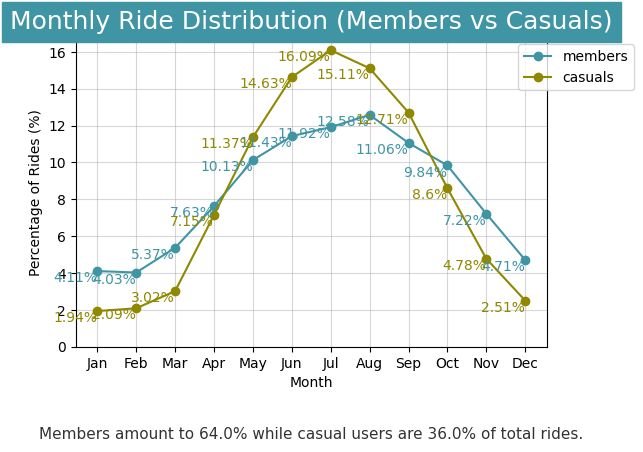

In [21]:
# Set the df for plot:
## Group the DataFrame by 'month' and calculate the size
grouped_month = df.groupby(['member_casual','month']).size()

## Line plot 1: Members
member_counts = grouped_month.loc['member']
## Calculate percentages for members:
member_percentages = round(member_counts / member_counts.sum()*100, 2) 

## Line plot 2: Casuals
casual_counts = grouped_month.loc['casual']
## Calculate percentages for casuals:
casual_percentages = round(casual_counts / casual_counts.sum()* 100, 2) 

# Preset for plot:
color = ['#4095A5', '#8F8800']
#plt.figure(figsize=(8, 5))  # Set the figure size

# Plot:
plt.plot(grouped_month.loc['member'].index, member_percentages.values, 
         color=color[0],marker='o',label='members')
plt.plot(grouped_month.loc['casual'].index, casual_percentages.values,
         color=color[1],marker='o',label='casuals')

# Annotate values on the graph
for x, y in zip(grouped_month.loc['member'].index, member_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='top', fontsize=10, color=color[0], rotation=0)

for x, y in zip(grouped_month.loc['casual'].index, casual_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='top', fontsize=10, color=color[1], rotation=0)


# Display: plot
plt.title("Monthly Ride Distribution (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.xlabel('Month')
plt.ylabel('Percentage of Rides (%)')
plt.ylim(bottom=0)
plt.grid(True,alpha=0.5)
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
plt.text(-1.5, -5, f"Members amount to {round(member_counts.sum()/grouped_day_of_the_week.sum()*100,2)}% while casual users are {round(casual_counts.sum()/grouped_day_of_the_week.sum()*100,2)}% of total rides.",
         alpha=0.8,fontsize=11,ha='left', wrap=True)
plt.tight_layout()


# Save image if set to True
if image_save==True:
    plt.savefig('Monthly Ride Distribution (Members vs Casuals).png', dpi=300)

plt.show()

<b>Main Takeaways</b>
<ul>
  <li><b>Monthly Ride Distribution:</b> The data reveals varying distributions of rides among members and casual users throughout the year, reflecting potential <u>seasonal trends or changes in user behavior</u>.</li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Gradual Increase:</b> Rides by members gradually increase from January to August. This upward trend suggests a growing usage of bike services by members during the warmer months, possibly for commuting or outdoor activities.</li>
      <li><b>Seasonal Fluctuations:</b> Ride percentages among members fluctuate throughout the year, with <u>higher percentages observed during the spring and summer months and lower percentages during the fall and winter months</u>. These fluctuations may be influenced by factors such as weather conditions and holidays.</li>
    </ul>
  </li>
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Significant Variation:</b> Ride percentages among <u>casual users exhibit greater variations compared to members</u>.</li>
      <li><b>Peak Season Summer:</b> <u>The summer months (June, July, and August) see the highest percentages of rides among casual users</u>, indicating a surge in usage during vacation seasons or warmer weather.</li>
    </ul>
  </li>
</ul>

<b>Ride Distribution Exhibits Seasonal Trends:</b> Ride counts reach an <u>all-time low during winter, while peaking during the summer months.</u><br>
<b>The distribution of rides among members has lower variance compared to casual users</b>, indicating a more consistent usage pattern among members. This suggests that members may use the bike services more regularly, likely for commuting or habitual activities, while casual users may be more influenced by external factors such as weather and holidays.

### 3.2.2 About Ride Duration <a id="about-ride-duration"></a>
---

We are gonna explore several central tendency measures, as we are concerned for:
<ul>
<li> There are durations are from 0 sec up to 1 minute</li>
<li> There are durations that last weeks or more </li>
</ul>
We will conduct a detailed analysis of ride durations to account for outliers. This involves plotting the mean, median, and trimmed mean ride durations to provide a comprehensive view of the central tendency of ride durations.
<ul>
<li><b>Mean Ride Durations:</b> By plotting the mean, we capture the overall average ride duration, which helps in understanding the general trend. However, this measure might be skewed by extreme values.</li>
<li><b>Median Ride Durations:</b> Plotting the median ride durations provides a robust central tendency measure that is not influenced by outliers, offering a clearer picture of the typical ride duration.</li>
<li><b>Trimmed Mean Ride Durations:</b> The trimmed mean, which excludes the smallest and largest ride durations, offers a balanced measure by mitigating the impact of outliers while retaining a significant portion of the data for analysis.</li>
</ul>
<br>
This multi-faceted approach ensures a thorough understanding of the ride duration patterns, accounting for various statistical perspectives and providing a more nuanced analysis of the data.

#### A. Weekly Ride Duration (Members vs Casuals)

##### Weekly Median Ride Duration (Members vs Casuals)

Comparing the median ride duration trends between members and casual riders across different days of the week.


C:\Users\Jim\AppData\Local\Temp\ipykernel_17040\1834425003.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].median()


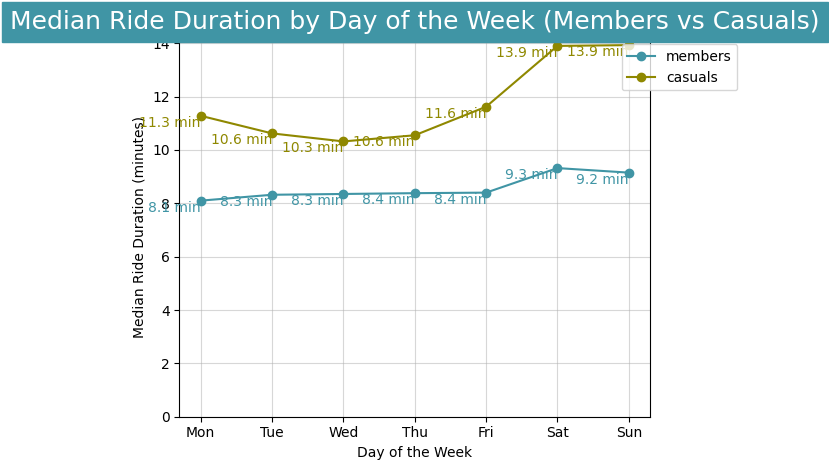

In [24]:
# Set the df for plot
## Filter out rows where ride_duration is not NA
df_filtered = df.dropna(subset=['ride_duration'])

## Group the DataFrame by 'day_of_the_week','member_casual', and calculate the median ride duration
grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].median()

## Durations for members
member_durations = grouped_day_of_the_week_duration.loc['member']
## Durations for casuals
casual_durations = grouped_day_of_the_week_duration.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
#plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate values on the graph
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='top', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='top', fontsize=10, color=color[1], rotation=0)

# Display: plot
plt.title("Median Ride Duration by Day of the Week (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Median Ride Duration (minutes)')
plt.ylim(bottom=0)
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Median Ride Duration by Day of the Week (Members vs Casuals)', dpi=300)

plt.show()


##### Weekly Mean Ride Duration (Members vs Casuals)

Comparing the mean ride duration trends between members and casual riders across different days of the week.


C:\Users\Jim\AppData\Local\Temp\ipykernel_17040\1105447510.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].mean()


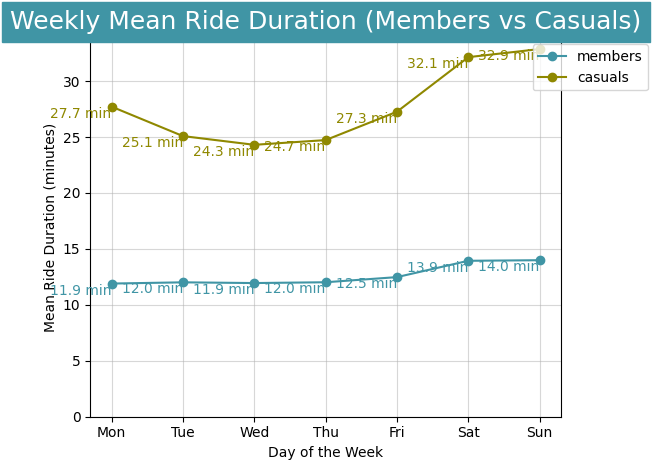

In [25]:
# Set the df for plot:
## Filter out rows where ride_duration is not NA
df_filtered = df.dropna(subset=['ride_duration'])

## Group the DataFrame by 'day_of_the_week' and 'member_casual', and calculate the average ride duration
grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].mean()

## Durations for members
member_durations = grouped_day_of_the_week_duration.loc['member']
## Durations for casuals
casual_durations = grouped_day_of_the_week_duration.loc['casual']

# Presets for plot:
color = ['#4095A5', '#8F8800']
#plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate values on the graph
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='top', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='top', fontsize=10, color=color[1], rotation=0)

# Display: plot
plt.title("Weekly Mean Ride Duration (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Ride Duration (minutes)')
plt.ylim(bottom=0)
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Weekly Mean Ride Duration (Members vs Casuals).png', dpi=300)

plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Day-of-the-Week Patterns:</b> Both members and casual users show distinct patterns in ride durations across different days of the week, <u>indicating potential differences in usage behavior.</u></li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Consistent Patterns:</b> Members demonstrate relatively <u>consistent ride durations from Monday to Friday</u>, suggesting regular commuting habits or usage patterns during weekdays (may be commuting to work). </li>
      <li><b>Weekend Variations:</b> <u>Ride durations for members increase notably during the weekend</u>, indicating a preference for longer rides during leisure time or weekend outings.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Varying Patterns:</b> <u>Casual users exhibit more variability</u> in ride durations across different days of the week compared to members.</li>
      <li><b>Weekend Surges:</b> <u>Ride durations for casual users increase significantly during the weekend</u>, indicating a preference for longer rides during leisure time or weekend outings.</li>
    </ul>
  </li>
</ul>
<b><u>Casual users show significantly higher ride durations compared to members.</u></b>

##### Weekly Trimmed Mean Ride Duration (Members vs Casuals)

Comparing the trimmed mean ride duration trends between members and casual riders across different days of the week.


C:\Users\Jim\AppData\Local\Temp\ipykernel_21828\830916855.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_trimmed_mean = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].apply(lambda x: trim_mean(x, proportion_to_cut))


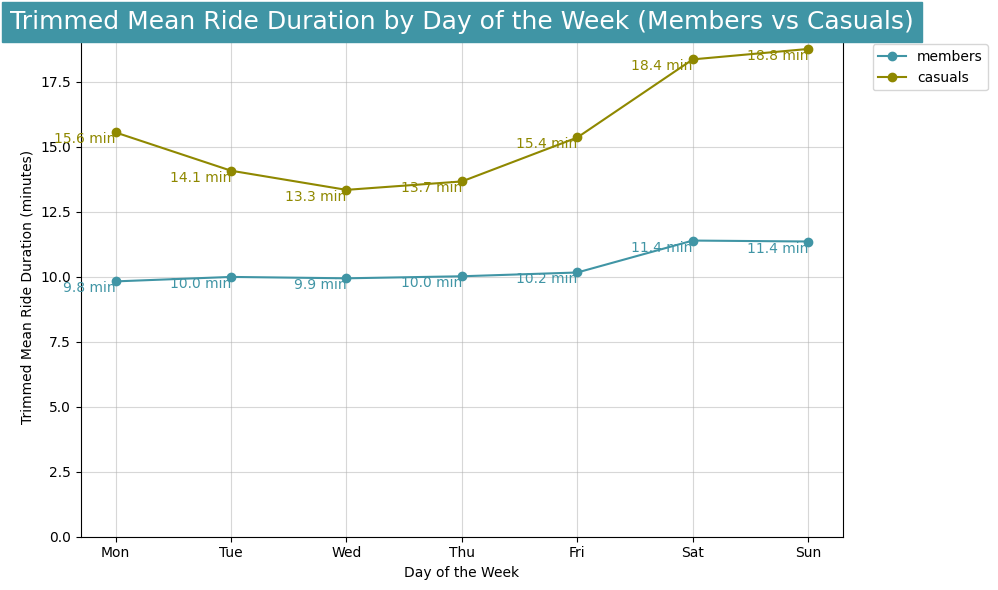

In [ ]:

# Filter out rows where ride_duration is not NA
df_filtered = df.dropna(subset=['ride_duration'])

# Define the proportion to cut for trimmed mean
proportion_to_cut = 0.05

# Group the DataFrame by 'day_of_the_week' and 'member_casual', then calculate the trimmed mean ride duration 
grouped_trimmed_mean = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].apply(lambda x: trim_mean(x, proportion_to_cut))

## Durations for members
member_durations = grouped_trimmed_mean.loc['member']
## Durations for casuals
casual_durations = grouped_trimmed_mean.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate values on the graph
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='top', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='top', fontsize=10, color=color[1], rotation=0)

# Display: plot
plt.title("Trimmed Mean Ride Duration by Day of the Week (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Trimmed Mean Ride Duration (minutes)')
plt.ylim(bottom=0)
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Weekly Trimmed Mean Ride Duration (Members vs Casuals).png', dpi=300)

plt.show()


#### B. Monthly Ride Duration (Members vs Casuals)

##### Monthly Mean Ride Duration (Members vs Casuals)

Comparing the mean ride duration trends between members and casual riders over different months.

C:\Users\Jim\AppData\Local\Temp\ipykernel_17040\2651293870.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].mean()


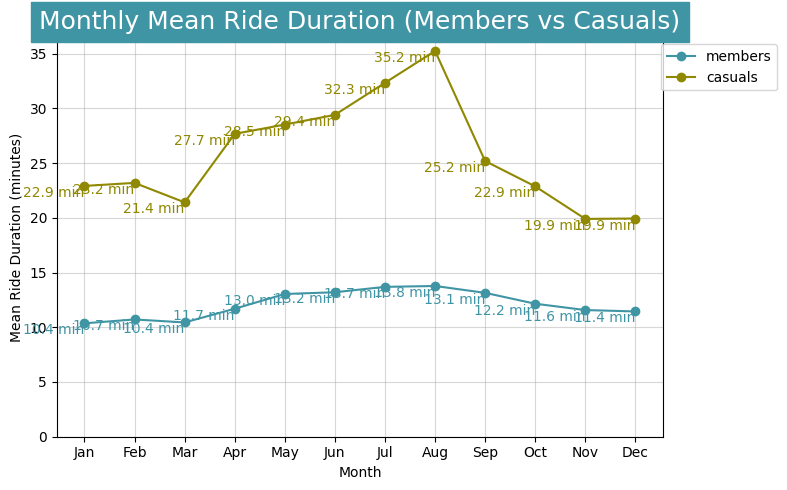

In [19]:
# Set the df for plot:
## Group the DataFrame by 'month' and 'member_casual', and calculate the average ride duration
grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].mean()

## Durations for members
member_durations = grouped_month_duration.loc['member']
## Durations for casuals
casual_durations = grouped_month_duration.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(8, 5))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate each point with its average duration value
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='top', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='top', fontsize=10, color=color[1], rotation=0)

# Display plot
plt.title("Monthly Mean Ride Duration (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Month')
plt.ylabel('Mean Ride Duration (minutes)')
plt.ylim(bottom=0)
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Monthly Mean Ride Duration (Members vs Casuals).png', dpi=300)

plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Seasonal Variations:</b> Ride durations exhibit fluctuations throughout the year, likely <u>influenced by seasonal factors such as weather and holidays</u>. They reach an all-time low during winter and experience a significant and steady increase at the start of spring, peaking during July and August.</li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Consistent Durations:</b> Despite fluctuations, <u>ride durations for members generally remain within a relatively narrow range, indicating consistent usage patterns over time</u>. This consistency reinforces the hypothesis that members use bikes for commuting purposes, as travel times remain relatively stable throughout the year.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Higher Variability:</b> <u>Ride durations for casual users demonstrate greater variability compared to members</u>, with larger fluctuations observed throughout the year.</li>
    </ul>
  </li>
</ul>


##### Monthly Trimmed Mean Ride Duration (Members vs Casuals)

Comparing the trimmed ride duration trends between members and casual riders over different months.


C:\Users\Jim\AppData\Local\Temp\ipykernel_21828\3787697209.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].apply(lambda x: trim_mean(x, proportion_to_cut))


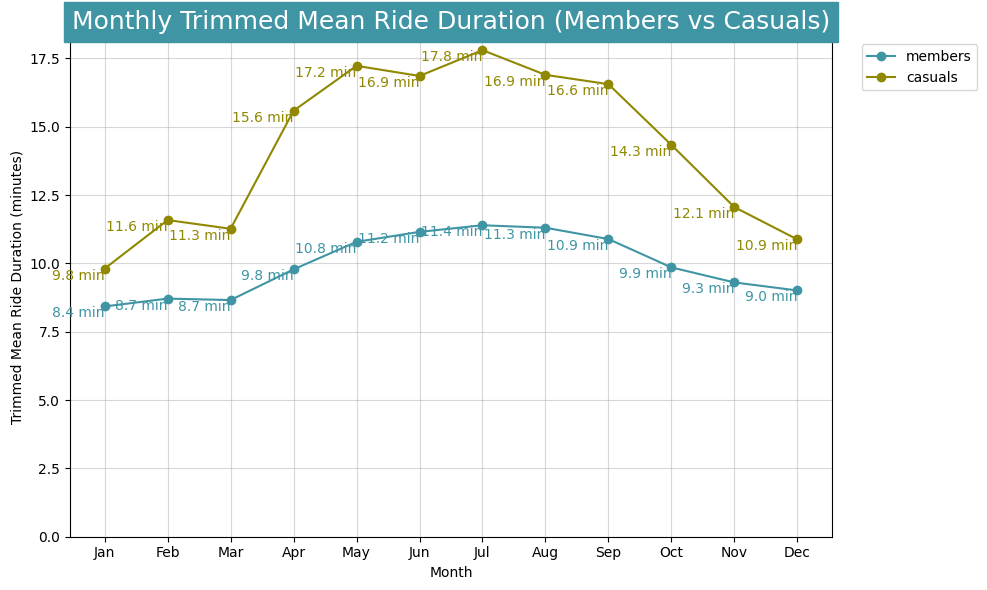

In [ ]:
# Set the df for plot:
# Group the DataFrame by 'month' and 'member_casual', and calculate the trimmed mean ride duration
grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].apply(lambda x: trim_mean(x, proportion_to_cut))

## Durations for members
member_durations = grouped_month_duration.loc['member']
## Durations for casuals
casual_durations = grouped_month_duration.loc['casual']

# Presets for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate values on the graph
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='top', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='top', fontsize=10, color=color[1], rotation=0)

# Display: plot
plt.title("Monthly Trimmed Mean Ride Duration (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Month')
plt.ylabel('Trimmed Mean Ride Duration (minutes)')
plt.ylim(bottom=0)
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Monthly Trimmed Mean Ride Duration (Members vs Casuals).png', dpi=300)

plt.show()


### 3.2.3 About Rideable Type <a id="about-rideable-type"></a>
---

#### A. Pie Chart: Rideable Type Distribution (Electric vs Classic Bikes)

Visualize the proportion of electric and classic bikes among rideable types.


C:\Users\Jim\AppData\Local\Temp\ipykernel_21828\3924977219.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rideable_type_size = filtered_df.groupby('rideable_type', dropna=False).size()


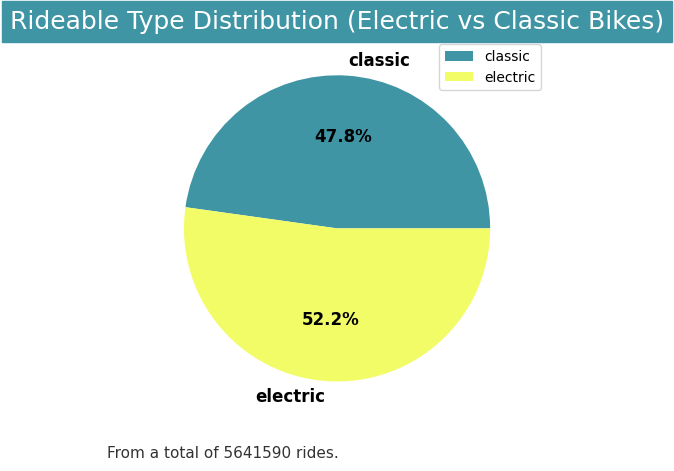

In [ ]:
# Set the df for plot:
filtered_df=df[df['rideable_type']!='docked_bike'].reset_index(drop=True)
filtered_df['rideable_type'] = filtered_df['rideable_type'].cat.remove_unused_categories()
# Group the DataFrame by 'rideable_type', and calculate the size
grouped_rideable_type_size = filtered_df.groupby('rideable_type', dropna=False).size()

## Calculate percentages for plot:
df_pie_rideable_type =grouped_rideable_type_size
df_pie_rideable_type = round(grouped_rideable_type_size / grouped_rideable_type_size.sum() * 100, 2)
## Change 'electric_bike' to 'electric' and 'classic_bike' to 'classic' for better display:
df_pie_rideable_type.index = ['electric' if x == 'electric_bike' else 'classic' if x == 'classic_bike' else x for x in df_pie_rideable_type.index]

# Presets for plot:
color = ['#4095A5', '#F2FC67']

# Plot
plt.pie(df_pie_rideable_type,
        colors=color,
        labels=df_pie_rideable_type.index,
        autopct='%1.1f%%',
        textprops={'weight': 'bold', 'size': 'large'})  # adjust textprops

# Display: plot
plt.title("Rideable Type Distribution (Electric vs Classic Bikes)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.legend(df_pie_rideable_type.index,
           loc='upper right',bbox_to_anchor=(1.05, 1))
plt.text(-1.5, -1.5, f"From a total of {grouped_rideable_type_size.sum()} rides.",
         alpha=0.8,fontsize=11,ha='left', wrap=True,)
plt.tight_layout()

# Save image if set to True
if image_save==True:
    plt.savefig('Rideable Type Distribution (Electric vs Classic Bikes).png', dpi=300)

plt.show()

<b>Main Takeaways</b>
<ul>
  <li><b>Balanced/Diverse Usage:</b> <u>The overall usage of bikes is relatively balanced</u>, with electric bikes being slightly more popular compared to classic bikes. This indicates a close preference between the two types of bikes among all riders. The nearly even split in bike usage highlights the importance of maintaining a diverse fleet.</li>
  <li><b>Potential for Growth:</b> <u>The slight edge of electric bike usage could signal a growing trend towards electric bike adoption</u>. This trend might continue as more riders become aware of and accustomed to the benefits of electric bikes.</li>
</ul>


#### B. Bar Charts: Rideable Types Distribution (Members vs Casuals)

Visualize the usage patterns of classic bikes versus electric bikes among different user groups (members and casual users). Understanding these patterns helps in optimizing bike availability and improving user satisfaction.</p>

C:\Users\Jim\AppData\Local\Temp\ipykernel_21828\2699997921.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()


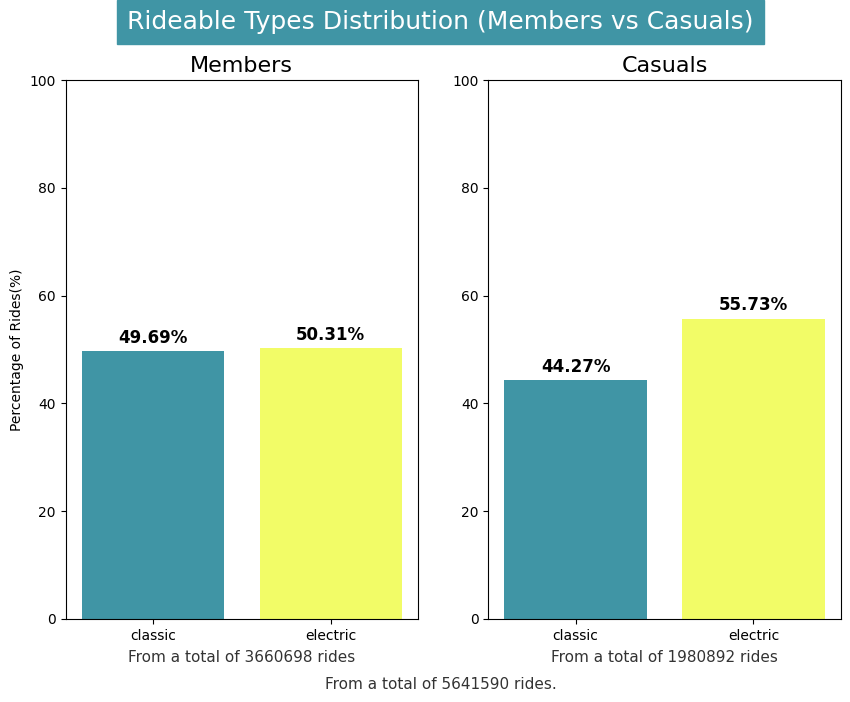

In [ ]:
# Set the df for plot:
filtered_df = df[df['rideable_type'] != 'docked_bike'].reset_index(drop=True)
filtered_df['rideable_type'] = filtered_df['rideable_type'].cat.remove_unused_categories()

## Group by 'member_casual' and 'rideable_type' and calculate sizes
grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()


## Calculate percentages for plots:
## Plot 1: Rideable_type percentages for members
df_rideable_type_m_c_member = grouped_rideable_type_size['member']
df_rideable_type_m_c_member = round(df_rideable_type_m_c_member / df_rideable_type_m_c_member.sum() * 100, 2)

## Plot 2: Rideable_type percentages for casuals
df_rideable_type_m_c_casual = grouped_rideable_type_size['casual']
df_rideable_type_m_c_casual = round(df_rideable_type_m_c_casual / df_rideable_type_m_c_casual.sum() * 100, 2)

## Change 'electric_bike' to 'electric' and 'classic_bike' to 'classic' for better display:
df_rideable_type_m_c_member.index = ['electric' if x == 'electric_bike' else 'classic' if x == 'classic_bike' else x for x in df_pie_rideable_type.index]
df_rideable_type_m_c_casual.index = ['electric' if x == 'electric_bike' else 'classic' if x == 'classic_bike' else x for x in df_pie_rideable_type.index]

# Preset for plot:
colors = ['#4095A5', '#F2FC67']

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=True)

# Plot for members
bars1 = ax1.bar(df_rideable_type_m_c_member.index, df_rideable_type_m_c_member, color=colors)
ax1.set_title("Members", fontsize=16)
ax1.set_ylabel('Percentage of Rides(%)')
ax1.set_ylim(0, 100)

## Add percentages on top of the bars: members
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, weight='bold')

# Plot for casuals
bars2 = ax2.bar(df_rideable_type_m_c_casual.index, df_rideable_type_m_c_casual, color=colors)
ax2.set_title("Casuals", fontsize=16)
ax2.set_ylim(0, 100)

## Add percentages on top of the bars: casuals
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, weight='bold')

# Add a main title
fig.suptitle("Rideable Types Distribution (Members vs Casuals)",
             color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')

# Add text below the plots
ax1.text(0.5, -8, f"From a total of {grouped_rideable_type_size['member'].sum()} rides",
         ha='center', fontsize=11, alpha=0.8, wrap=True)
ax2.text(0.5, -8, f"From a total of {grouped_rideable_type_size['casual'].sum()} rides",
         ha='center', fontsize=11, alpha=0.8, wrap=True)
fig.text(0.5, 0.01, f"From a total of {grouped_rideable_type_size['member'].sum()+grouped_rideable_type_size['casual'].sum()} rides.",
         ha='center', fontsize=11, alpha=0.8, wrap=True)

# Save image if set to True
image_save = False  # Set to True if you want to save the image
if image_save:
    plt.savefig('Rideable Types Distribution (Members vs Casuals).png', dpi=300, bbox_inches='tight')

# Display plot
plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Even Distribution:</b> <u>Among members, the percentage distribution of bike types is almost evenly split.</u> This indicates a balanced preference between the two bike types among members.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Preference:</b> <u>Casual users exhibit a more pronounced preference for electric bikes</u>. This suggests that casual users may find electric bikes more appealing or convenient for their riding needs.</li>
    </ul>
  </li>
</ul>


## 4. Conclusion
---

<u><h1>Comparison between Members and Casual Users</h1></u>

<h3>Ride Distribution:</h3>

<ul>
  <li>Members account for 64.0% of total rides, while casual users represent 36.0%.</li>
  <li><b>Weekly Ride Distribution:</b> A distinction emerges between members and casuals—<u>members tend to utilize the service more on weekdays, whereas casual users show higher activity levels on weekends.</u></li>
  <li><b>Monthly Ride Distribution:</b> <u>Both members and casual users exhibit similar monthly ride patterns</u>, with activity dipping during winter and peaking in summer. However, casual users display greater variability.</li>
</ul>

<h3>Ride Duration:</h3>

<ul>
  <li><b>Weekly Mean Ride Duration:</b></li> <u>Both groups peak during weekends,</u> with a more notable increase for members and a significant one for casual users, likely attributable to increased leisure time.
  <ul>
  <li><b>Members:</b> <u>Show consistent ride durations from Monday to Friday,</u> indicating regular commuting habits or weekday usage patterns (possibly related to work commutes).</li>
  <li><b>Casual users:</b> <u>Exhibit greater variability in ride durations</u> across different days of the week compared to members, with a more pronounced peak on weekends.</li>
  </ul>
</ul>

<h3>Bike Types:</h3>

<ul>
  <li>Electric bikes constitute 52.2% of total rides, while classic bikes make up the remaining 47.8%.</li>
  <li><b>Members' Rideable Type Distribution:</b> <u>Among members, the distribution of bike types is nearly even.</u> This suggests a balanced preference between electric and classic bikes among members.</li>
  <li><b>Casual Users' Rideable Type Distribution:</b> <u>Casual users exhibit a more pronounced preference for electric bikes,</u> indicating a higher preference or convenience for electric bikes among this group.</li>
</ul>

## 5. Suggestions
---

<u><h2>Turn Casual Users into Members:</h2></u>
<ol>
  <li><b>A New Tailored Membership Package:</b> Introduce a membership package tailored to the preferences of casual users, such as weekend or Friday to Saturday memberships. This complementary option won't disrupt current memberships, which primarily serve weekday commuting needs.</li>
  <li><b>Optimize Fleet and Pricing:</b> Tailor the bike fleet and pricing structure to cater to the preference for electric bikes among casual users. Prioritize electric bikes in the fleet and adjust pricing accordingly to better align with their preferences.</li>
</ol>

<u><h2>Marketing Campaigns:</h2></u>
<ol>
  <li><b>Post-April Advertising:</b> Launch targeted advertising and social media campaigns after April, capitalizing on the significant increase in bike usage observed during this period, which peaks in summer. This strategic timing aims to maximize engagement and conversion rates.</li>
  <li><b>Pre-September Promotional Offers:</b> Implement promotional offers and incentives before September to boost customer retention during the anticipated autumn-winter drop-off in bike usage. By providing attractive discounts or perks, the service can encourage continued usage and loyalty among members and casual users alike.</li>
</ol>


## 
